In [100]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.2.0
Numpy: 1.19.2
Sklearn: 0.24.0
Matplotlib: 3.3.3
Keras: 2.4.3


In [101]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [104]:
data = pd.read_csv('C:/Users/Pavithra/Documents/DATASETS/heart.csv')

In [105]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [106]:
# remove missing data (indicated with a "?")
data = data[~data.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [108]:
print(data.shape)
print(data.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [109]:
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

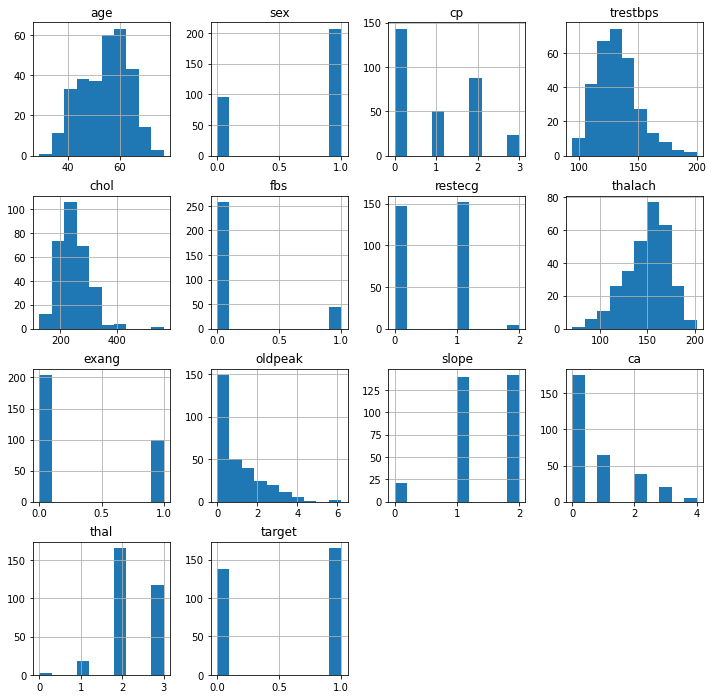

In [110]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

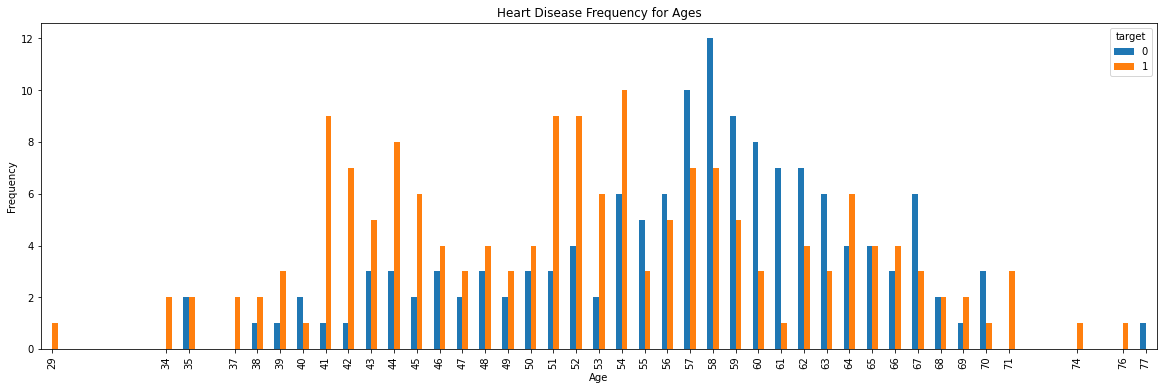

In [111]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

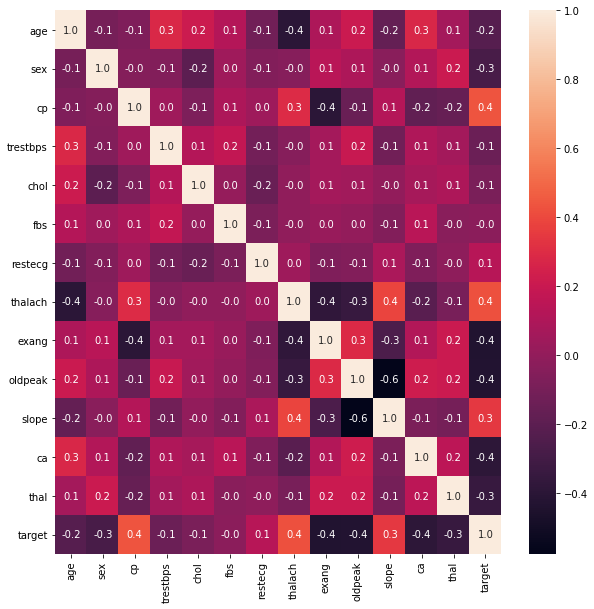

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

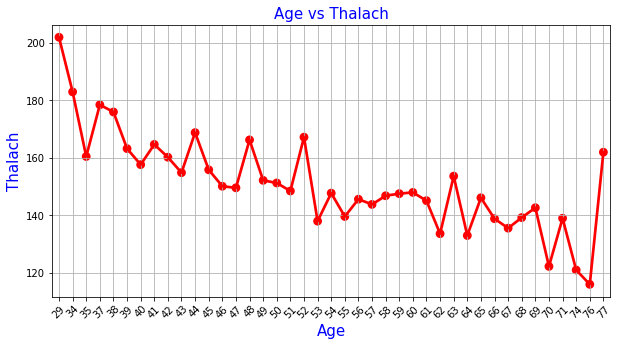

In [113]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [114]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [115]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [116]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [156]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [118]:
X[1]

array([-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
       -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
       -2.27457861, -0.71442887, -0.51292188])

In [119]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [120]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [121]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [123]:
y_train[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [124]:
X_train[:10]

array([[ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
        -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
         0.97635214,  1.24459328, -0.51292188],
       [ 1.28306308,  0.68100522,  0.03203122,  1.62064933, -0.00510244,
        -0.41763453,  0.89896224, -1.29647236,  1.43548113, -0.89686172,
        -0.64911323,  2.22410436, -2.14887271],
       [ 0.06988599, -1.46841752, -0.93851463, -0.20696359, -0.79744721,
        -0.41763453,  2.80375634, -0.85916731,  1.43548113,  0.82852939,
        -0.64911323,  0.26508221,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, -1.23499586,  1.71486549,
        -0.41763453,  0.89896224, -0.29067075,  1.43548113,  1.69122495,
        -0.64911323,  0.26508221,  1.12302895],
       [ 1.83450721, -1.46841752,  1.00257707, -1.23499586,  0.36208173,
         2.394438  , -1.00583187, -0.85916731, -0.69663055, -0.89686172,
         0.97635214,  0.26508221, -0.51292188],
       [ 1.28306308,  0.681005

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


In [126]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [127]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 15ms/step - loss: 0.6837 - accuracy: 0.6005 - val_loss: 0.6646 - val_accuracy: 0.7869
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.7649 - val_loss: 0.6295 - val_accuracy: 0.8197
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.7699 - val_loss: 0.5850 - val_accuracy: 0.8525
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.8764 - val_loss: 0.5361 - val_accuracy: 0.8525
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.8260 - val_loss: 0.4954 - val_accuracy: 0.8525
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8199 - val_loss: 0.4629 - val_accuracy: 0.8197
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8254 - val_loss: 0.4390 - val_accuracy: 0.8197
Epoch 8/50
25/25 [=

In [128]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [209]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [210]:
# fit the binary model on the training data
history=binary_model.fit(X_train, y_train, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 22ms/step - loss: 0.6927 - accuracy: 0.4800 - val_loss: 0.6818 - val_accuracy: 0.8033
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.7470 - val_loss: 0.6626 - val_accuracy: 0.8197
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6464 - accuracy: 0.7990 - val_loss: 0.6318 - val_accuracy: 0.7705
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.8788 - val_loss: 0.5975 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.8671 - val_loss: 0.5637 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.8125 - val_loss: 0.5281 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.8598 - val_loss: 0.5010 - val_accuracy: 0.7541
Epoch 8/50
25/25 [=

In [236]:
arr = np.array([  [ 0.84190778,  0.68100522, -0.93851463, -0.66386682,  0.40073269,
        -0.41763453,  0.89896224, -2.21481297,  1.43548113,  0.65599028,
        -0.64911323,  1.24459328,  2.12302895]])
categorical_pred = binary_model.predict(arr)

In [237]:
categorical_pred

array([[0.00619048]], dtype=float32)

In [238]:
converter = lite.TFLiteConverter.from_keras_model(binary_model)

tfmodel = converter.convert()

open('newheart_dispred.tflite', 'wb').write(tfmodel)


INFO:tensorflow:Assets written to: C:\Users\Pavithra\AppData\Local\Temp\tmpehcqhbrg\assets


3304